# Main Problem - Linear Solutions to Nonlinear Observations

Why is this complicated?

In short because rubber is a non-linear material. Consider the in-depth  
explanation provided [here.](https://www.sealseastern.com/pdf/shore-a%20durometer%20and%20engineering%20properties.pdf)

A linear material has a constant slope stress strain curve,

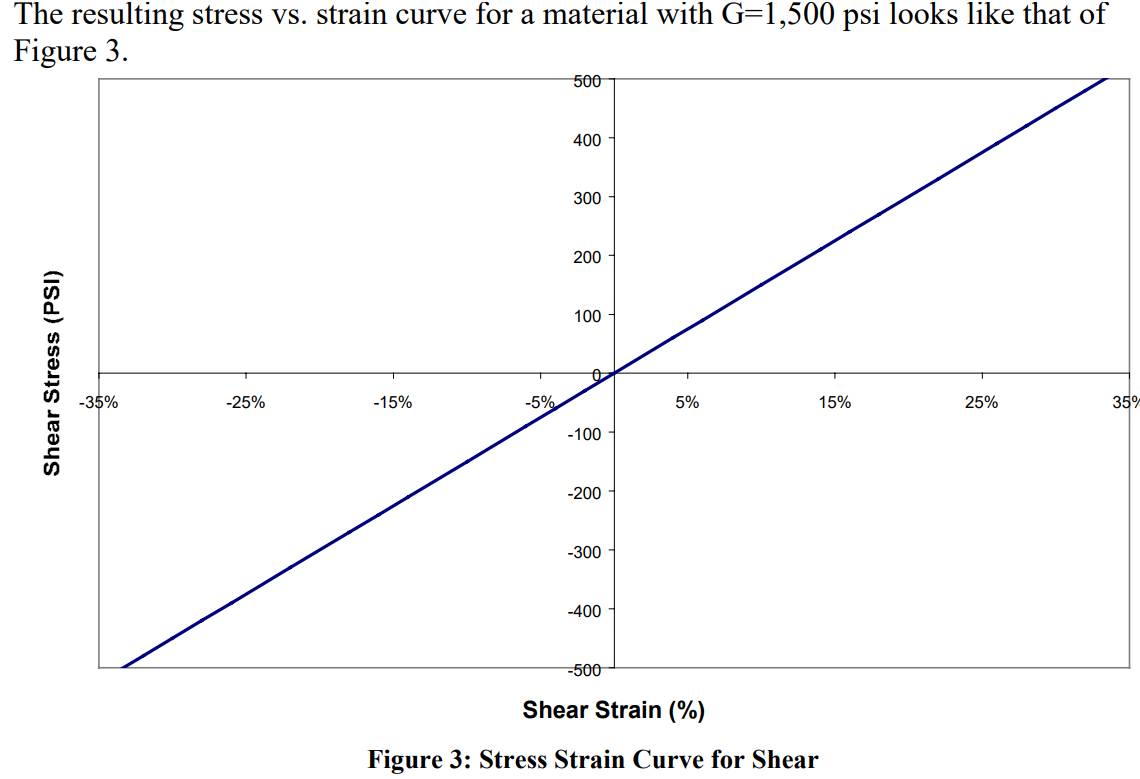

Rubber is a non-linear material,

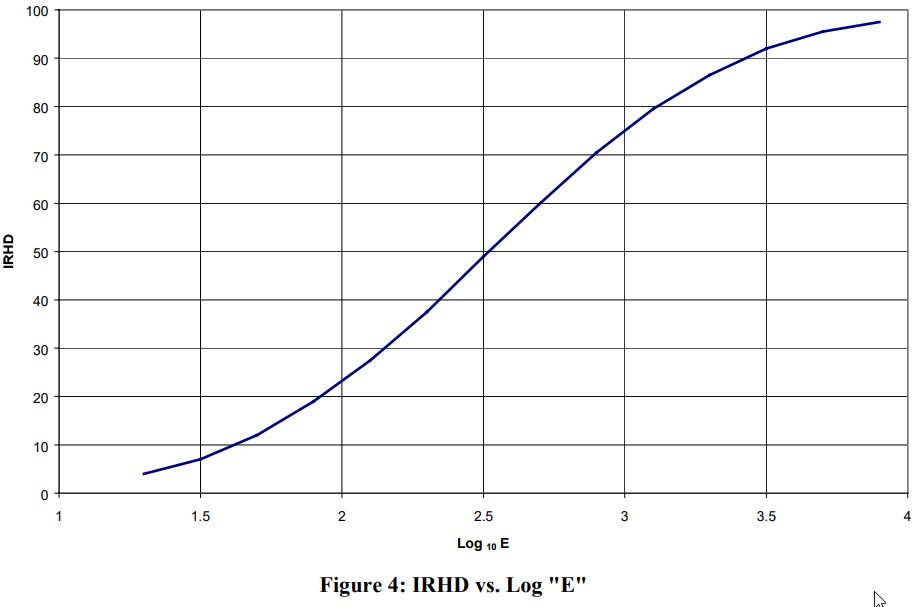

This makes it difficult to calculate in applications like excel or various  
computer applications because the results of the stress are dependent on  
the inputs of the user, creating an iterative process. There are two  
schools of thought to representing this relationship in calculations and  
applications.

## Solution 1 - Formula Derivation

Try to match the graphs provided by AASHTO to curves using mathmatical  
formulas, an example of this method can be seen outlined [here.](#Check-5---AASHTO-14.7.6.3.3-&-14.7.5.3.6)

This method is somewhat subjective and hard to keep repeatable, for that  
reason, ODOT has elected to select the second method. 

## Solution 2 - Shear Modulus Approximation

ODOT has elected to instead standardize utilizing the simplified formula
method,

See the Commentary of Section 14.7.5.3.6, there AASHTO recommends use of  
either this formula;

$$ \varepsilon = \frac{\sigma}{4.8 G S^2} \tag{AASHTO\ C14.7.5.3.6-1} $$

or Fig. C14.7.6.3.3-1,

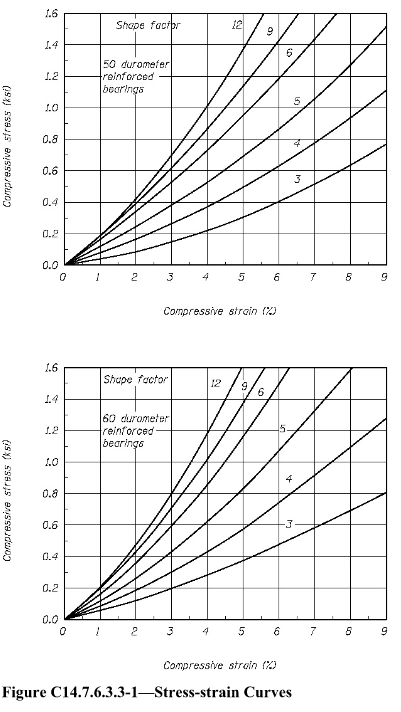

It is given with the following warning,

> It should be noted that as shape factors become (greater than ~6), the  
> correlation of results between Eq. C14.7.5.3.6-1 and Figure C14.7.6.3.3-1  
> diverges.  Eq. C14.7.5.3.6-1 provides a linear solution for a material  
> that exhibits nonlinear behavior in compression.

For Value's of G, ODOT's policy is to use the average value of the shear
moduli provided by AASHTO Table 14.7.6.2-1,

For the following shore values;

$ G_{50} $ = .1125  
$ G_{60} $ = .165  
$ G_{70} $ = .25  

It should also be noted that rubber has a dead load creep, for which values  
are provided in the same table.

Therefore the official way ODOT calculates deflection of a bearing can be  
defined as,

In [27]:
def get_bearing_strain(stress, shape_factor, hardness):
    if hardness == 50:
        return stress / (4.8 * .1125 * shape_factor ** 2)
    elif hardness == 60:
        return stress / (4.8 * .1125 * shape_factor ** 2)
    elif hardness == 70:
        return stress / (4.8 * .1125 * shape_factor ** 2)
    else:
        return "Error: Hardness not supported, please use 50, 60, or 70"

In [28]:
# Example usage:
get_bearing_strain(
    .68,    # Stress in ksi
    9.709,  # Shape Factor (rounded 2 decimal places)
    50
)

0.013358760098697617

# AASHTO Design Methods

Stress limits associated with Method A usually result in a bearing with a  
lower capacity than a bearing designed using Method B. The increased  
capacity requires additional testing and QC (Article C14.7.5.1). Designers  
must specify which method is used in the bearing design to verify  
fabrication and QC complies with the requirements.

Other elastomeric bearings (plain elastomeric pads (PEP),  
fiberglass-reinforced pads (FGP), and cotton duck fabric pads (CDP)). Must  
be designed in accordance with AASHTO LRFD BDS Method A.

Shear modulus is critically important, designer should use the min and max  
values of G for various durometer hardness as shown in AASHTO LRFD BDS.  
Fabricators have compounds for different durometer hardness, which in turn  
have average shear moduli. Although you can spec an elastomer by shear  
modulus, check with fabricators to obtain their shear modulus limits.

If spec'ed by shear modulus, AASHTO allows a 15% tolerance range to the  
fabricators measured shear tolerance. Instead, elastomers are typically  
specified by durometer hardness only. If specifying by durometer, shear  
modulus should not be given and vice versa.

If specifying the elastomer based on durometer, designers must consider  
that a range of shear modulus can be expected, see figure (AASHTO Table  
14.7.6.2-1), and must consider the least favorable value (maximum or  
minimum) for each step in the bearing design.

![image.png](attachment:cf0f2545-9c7e-4968-a39e-a95e361d9d79.png)

<!-- # //TODO - Confusing next couple of sections, says you can't do 
something and then explains how you would do that. -->

Elastomeric bearings cannot be set with an initial offset to account for  
varying temperatures at the time of installation. 

When initial offsets are necessary, the designer should multiply the design  
translation by a minimum factor of safety of 1.5 or verify that the  
contractor is required to reset the bearing. For bearings that must be  
reset the contract documents should include a note similar to ODOT's C&MS,  
"If the steel is erected at an ambient temperature higher than 80 F or  
lower than 40 F and the bearing shear deflection exceeds one-sixth of the  
bearing height at 60 F ± 10 F, raise the beams or girders to allow the  
elastomeric bearings to return to their undeformed shape at 60 F ± 10F."

If the elastomeric bearing includes a sliding surface, the designer should  
indicate, in the contract plans, the initial offset from centerline to use  
during erection/installation depending on temperature.

Some states require elastomeric bearings to be designed for one-way  
translation equal to the movement expected through the entire high-low  
temperature range. This is very conservative, but allows the bearing to be  
set at any temperature without requiring it to be reset at a given  
mid-range temperature. 

<!-- # //TODO - Verify above doesn't apply to Ohio -->

AASHTO LRFD BDS C14.4.2 requires the design rotation for elastomeric  
bearings to be the sum of the rotations due to all unfactored loads and an  
allowance for uncertainties, taken as 0.005 radians (unless an approved  
quality control plan justifies the use of a smaller value). AASHTO LRFD BDS  
also requires that sole plates be beveled to produce a level-bearing  
surface at the top of the elastomeric bearing when the underside of the  
girder, under the full dead load and at the mean annual temperature, is out  
of level by more than 0.01 radians (1%). This implies that beveled sole  
plates are not required if the out of plane rotation is less than 1%. If  
the designer elects not to use beveled sole plates (see discussion on sole  
plates later in this volume) at slopes less than or equal to 1.0%, then the  
additional permanent rotation induced by the out of plane condition must be  
added into the required design rotation sum, including the 0.005 radian  
allowance for uncertainties. 
 
Elastomeric bearings have also been used in the design of seismic isolation  
systems.  Refer to AASHTO Guide Specifications for Seismic Isolation Design  
for design, fabrication and quality control tests supplementary to the  
Standard Specifications.

## Method B

AASHTO Article 14.7.5

Done first since method A builds on some of the formulas and Method B is  
shown first in AASHTO.

In [2]:
print('Hello World')

Hello World


In [5]:
from civilpy.structural.steel import W

In [6]:
beam = W('W40X249')

In [7]:
beam.area

<Quantity(73.5, 'inch ** 2')>

### 14.7.5.1 - General

Steel-reinforced elastomeric bearings may be designed using either of two  
methods commonly referred to as Method A and Method B. Where the provisions  
of this Article are used, the component shall be taken to meet the  
requirements of Method B. Where the provisions of Article 14.7.6 are used,  
the component shall be taken to meet the requirements of Method A.

Steel-reinforced elastomeric bearings shall consist of alternate layers of  
steel reinforcement and elastomer bonded together. In addition to any  
internal reinforcement, bearings may have external steel load plates bonded  
to either or both upper or lower elastomer layers.

Tapered elastomer layers shall not be used. All internal layers of  
elastomer shall be of the same thickness. The top and bottom cover layers  
shall be no thickener than 70% of the internal layers, or 5/16", whichever  
is greater. Minimum edge cover for steel reinforcement shall be 1/4".

The shape factor of an elastomeric bearing, $S_i$, shall be taken as the  
plan area of the layer divided by the area of perimeter free to bulge.  
Unless noted otherwise, the values of $S_i$ and $h_{ri}$ to be used in  
Articles 14.7.5 and 14.7.6 for steel-reinforced elastomeric bearing design  
shall be that for an internal layer. For rectangular bearings without  
holes, the shape factor of a layer may be taken as:

$$ S_i = \frac{LW}{2 h_{ri}(L+W)} \tag{14.7.5.1-1}$$

where:

$L$ = Plan dimension of the bearing perpendicular to the axis of rotation  
under consideration (generally parallel to the global longitudinal bridge  
axis)(in.) 

$W$ = Plan dimension of the of the bearing parallel to the axis of rotation  
under consideration (generally parallel to the global transverse bridge  
axis) (in.)

$h_{ri}$ = Thickness of the *i*th elastomeric layer (in.)

For circular bearings;

$$ S_i = \frac{D}{4 h_{ri}} \tag{14.7.5.1-2} $$

where:

$D$ = diameter of the projection of the loaded surface of the bearing in  
the horizontal plane (in.)

For bearings with holes,

Rectangular;

$$ S_i = \frac{LW - \sum \frac{\pi}{4}d^2}{h_{ri}[2L + 2W + \sum \pi d]} 
\tag{C14.7.5.1-1} $$

Circular;

$$ S_i = \frac{D^2 - \sum d^2}{4 h_{ri} (D+\sum d)} \tag{C14.7.5.1-2} $$

where:

$d$ = the diameter of the hole or holes in the bearing (in.)

### 14.7.5.2 - Material Properties



### 14.7.5.3 - Design Requirements

#### 14.7.5.3.1 - Scope

Bearings designed by the provisions herein shall be tested in accordance  
with the requirements for steel-reinforced elastomeric bearings as  
specified in Article 18.2 of the AASHTO *LRFD Bridge Construction  
Specifications* and the AASHTO M 251M/M 251

#### 14.7.5.3.2 - Shear Deformations

The maximum horizontal displacement of the bridge superstructure, $\Delta_O$,  
shall be taken as 65 percent of the design thermal movement range, $\Delta_T$,  
computed in accordance with Article 3.12.2, combined with movements caused  
by creep, shrinkage, and post-tensioning.

The maximum shear deformation of the bearing at the service limit state,  
$\Delta_S$, shall be taken as $\Delta_O$, modified to account for the  
substructure stiffness and construction procedures. If a low-friction  
sliding surface is installed, $\Delta_S$ need not be taken to be larger  
than the deformation corresponding to first slip.

The bearing shall satisfy:

$$ h_{rt} \geq 2 \Delta_S \tag{14.7.5.3.2-1} $$

where:

$h_{rt}$ = total elastomer thickness (in.)

$\Delta_S$ = maximum total shear deformation of the elastomer from  
applicable service load combinations in Table 3.4.1-1 (in.)

## Method A

AASHTO Article 14.7.6

### 14.7.6.1 - General

`Method A` Design applies to the design of:

- PEP (Plain elastomeric pads)
- FGP (Fiberglass-reinforced pads)
- Steel-reinforced Elastomeric bearings in which $S_i^2/n < 22$ and for  
which the primary rotation is about a horizontal axis perpendicular to the  
beam centerline; and
- CDP with closely spaced layers of cotton duck and manufactured and tested  
under compression in accordance with Military Specification MIL-C-882E  
except where superseded by these Specifications.

where:

$n$ = number of interior layers of elastomer, where interior layers are  
defined as those layers which are bonded only on one face. When the  
thickness of the exterior layer of elastomer is equal to or greater than  
one-half the thickness of an interior layer, the parameter $n$ may be  
increased by one-half for each such exterior layer.  
$S_i$ = shape factor of the *i*th internal layer of an elastomeric bearing.

Layer thicknesses in FGP may vary. For steel-reinforced elastomeric  
bearings designed in accordance with the provisions of this Section,  
internal layers shall be of the same thickness, and cover layers shall be  
no more than 70% of the thickness of internal layers, or 5/16". Whichever  
is greater.  Minimum edge cover for steel reinfocement shall be 1/4".

The shape factor for PEP, FGP pads and steel-reinforced elastomeric  
bearings covered by this article shall be determined as specified in  
Article 14.7.5.1. The shape factor for CDP shall be based upon the total  
pad thickness.

In [13]:
import sys

# Temporary override to import functions before they're pushed to production
sys.path.insert(1, r'C:\Users\dparks1\PycharmProjects\civilpy\src\civilpy')

In [14]:
from civilpy.structural.aashto.bearings import MethodABearing

In [15]:
# //TODO - Refine these loads and establish a standard for them
loads = {
    "live": 15.32,
    "dead": 51.22,
    "additional": 5.93,
    "dead_no_fws": 43.72,
}

loads["total_load"] = loads['live'] + loads['dead'] + loads['additional']
loads["total_dead_load"] = loads['dead_no_fws'] + loads['additional']

In [16]:
print(loads["total_load"])
print(loads["total_dead_load"])

72.47
49.65


In [17]:
# These mostly came from LEAP
maximum_dl_deflection = 1.471
maximum_ll_deflection = -0.274
max_ll_deflect_coord = 12.5
span_length = 12.5
deck_slope = .01
load_plate_bevel = .01

In [18]:
bearing = MethodABearing(
    width = 12,
    length = 7,
    durometer = 50,
    internal_t = .28,
    external_t = .185,
    steel_t = .105,
    plys = 5,
    span = 12.5,
    expansion_length = 125,
    loads = loads,
    max_dl_delta = maximum_dl_deflection,
    max_ll_delta = maximum_ll_deflection,
    max_ll_loc = max_ll_deflect_coord,
    deck_slope = deck_slope,
    plate_bev = load_plate_bevel,
    edge_cover = 1/4  # Shown as 1/8" in drawings = Fails
)

Thermal expansion check failed, 2 * delta_s > h_ri


In [22]:
bearing.checks

{'Steel Laminate Edge Cover Check': 1,
 'External Thickness Check > 5/16"': 1,
 'External Thickness > 70% Internal': 1,
 '#2 - Service LL Check': 1,
 '#3 - Service LL < 1.25 ksi': 1,
 '#5 - Needs Fixed': 1,
 '#6 - Needs Fixed': 1,
 '#7 - Needs Fixed': 1,
 '#8 - Thermal Expansion': 0,
 '#9 - Maximum Elastomer height > 5"': 1,
 '#10 - Maximum laminate height < 1"': 1,
 '#11 - Laminate Width / 3 > Total Laminate Thickness': 1,
 '#12 - Bearing Length / 3 > Total Laminate Thickness': 1,
 '#13 - Bearing Area < 1000': 1,
 '#14 - Total elastomer thickness < 8"': 1,
 '#15 - Total Dead Load': 1,
 '#16 - Steel Reinforcement - Service Limit State': 1,
 '#17 - Steel Reinforcement - Service Limit State': 1,
 '#18 - Total Strain': 1,
 '#19 - Total Strain Check 2': 1}

In [20]:
bearing.ll_deflection

-0.274

### Excel Sheet Checks

Based on ODOT excel sheet that contained 19 checks to do a type A design

#### Check 1 - AASHTO 14.7.6.1

`# //TODO - I don't love how this one was done in excel - it compares against 20 vs comparing against 22 if there's more than 3 layers... I couldn't find that in AASHTO.`

Python Version:

```python
def check_shape_factors(self):
    adjusted_plys = self.plys - 1  # Number of elastomeric layers is 1 less 
                                   # than steel plates

    # 14.7.6.1 - Count external layers as 1/2 if greater than half the 
    # thickness of internal
    if self.internal_t / 2 >= self.external_t:
        adjusted_plys = self.plys
    if self.internal_shape_factor ** 2 / adjusted_plys > 22:
        self.checks['Internal Shape Factor Check'] = 0
        print("ShapeFactors Check Failed - Internal layer shape factor >"
              "22 - Use Method A")
    else:
        self.checks['Internal Shape Factor Check'] = 1
```

#### Check 2 - AASHTO 14.7.6.3.2-7

Calculates Service Average Compressive stress due to total load and  
compares it to the factored allowable load: 

$$ \sigma_s \leq 1.25G S_i \tag{14.7.6.3.2-7} $$

In [9]:
service_ll = loads['total_load'] / (bearing.length * bearing.width)
service_ll

0.8627380952380952

In [10]:
# Taken as maximum from AASHTO Table 14.7.6.2-1
shear_modulus = 0.095  # //TODO - Non-conservative?

In [11]:
if service_ll <= 1.25 * shear_modulus * bearing.internal_shape_factor:
    print('OK')
else:
    print('NG')

OK


In [12]:
1.25 * shear_modulus * bearing.internal_shape_factor

0.9374999999999999

#### Check 3 - AASHTO 14.7.6.3.2-8

Makes sure the factored service load is lower than 1.25 ksi;

$$ \sigma_s \leq 1.25\ ksi \tag{14.7.6.3.2-8} $$

In [13]:
service_ll

0.8627380952380952

#### Check 4 - AASHTO 14.7.6.3.3-1

As written, this check only applies to plain elastomeric pads CDPs. What's  
being checked in the excel sheet doesn't align with what's written in  
AASHTO in this section.

`# //TODO - Phillip looking into this one`

```excel
=IF( # If the rounded value of the shape factor formula > 12, make it 12
  ROUND(
    (
      (F$21*F$22) / 
      (
        2*F$23*(F$21+F$22)
      )
    ),
    0
  )>12,
12,
ROUND( # Else use the rounded value
  (F$21*F$22) / 
  (
    2*F$23*(F$21+F$22) 
  ),
  0))
```

How to implement in python, (not currently done until background is verified).

```python
# In python the same check (Not actually implemented)
if bearing.internal_shape_factor > 12:
    bearing.internal_shape_factor = 12
```

In [14]:
bearing.internal_shape_factor

7.894736842105263

#### Check 5 - AASHTO 14.7.6.3.3 & 14.7.5.3.6

Compressive deflection - 

Section 14.7.6.3.3

In addition to the provisions of Article 14.7.5.3.6 the following shall  
also apply.

The compressive deflection under instantaneous live load and initial dead  
load of a PEP or an internal layer of a steel-reinforced elastomeric  
bearing at the service limit state without impact shall not exceed $0.09h_{ri}$,  
where $h_{ri}$ is the thickness of a PEP, or the thickness of an internal  
layer of a steel-reinforced elastomeric bearing (in.).

Section 14.7.5.3.6

$$ S_L = \sum \epsilon_{Li} h_{ri} \tag{14.7.5.3.6-1} $$

where:

$\epsilon_{Li}$ = instantaneous live load compressive strain in *i*th elastomer layer  
$h_{ri}$ = thickness of the *i*th elastomeric layer (in.)

In [15]:
# Live Load
live_load = 113.5

# Service average compressive stress due to live load
sigma_l = live_load / (bearing.width * bearing.length)
sigma_l

1.3511904761904763

```excel
=IF(
    F13=50, # If Durometer = 50, use 50 table, else use 60
    VLOOKUP(F44,'DATA 50'!A168:B177,2,1),  # Lookup Shape Factor in the table
    VLOOKUP(F44,'DATA 60'!A168:B177,2,1)   # Return column 2
    )
```

**The Table A168:B177 Contains the following values**

Live Load	
| Shape Factor |   %  |
|:------------:|:----:|
|      3       | 5.6  |
|      4	   | 3.88 |
|      5	   | 2.91 |
|      6	   | 2.14 |
|      7	   | 2.04 |
|      8	   | 1.95 |
|      9	   | 1.85 |
|      10      | 1.81 |
|      11      | 1.77 |
|      12      | 1.73 |


The % values are determined by the following excel formula,

```excel
# Shown for "Shape Factor"=3
=VLOOKUP(
    LRFDGirder!$F$48,  # Service Average Compressive stress due to LL
    $AL$3:$AM$163,     # "Shape Factor" = 3 table
    2,                 # Return column 2
    1                  # Approximate match
)
```

The value the above formula returns, is defined by the `F48` value of  
`LRFDGirder`=0.37 ($\sigma_L$ calculated in python above) and the formula,

```excel
=ROUND(
    (AM8-AM3) /  # Straight line interpolation, weird it doesnt use `$`s
    (AL8-AL3) * 
    (AL4-AL3) + 
    AM3,
    2
    )
```

The above formula is just a linear interpolation of the values within the
chart to determine the value to use in % deformation.

for this first cell given, the values are ("Shape Factor"=3)

| $\sigma_S$ |    %    |
|:----------:|:-------:|
| 0 (AL3)    | 0 (AM3) |
| 0.05 (AL8) | 1 (AM8) |

These seem to be take from LRFD C14.7.6.3.3-1, Values from 0-1.6 ksi were  
taken from the charts, and then interpolated by both stress and shape  
factor to determine the values for all stresses and shape factors.

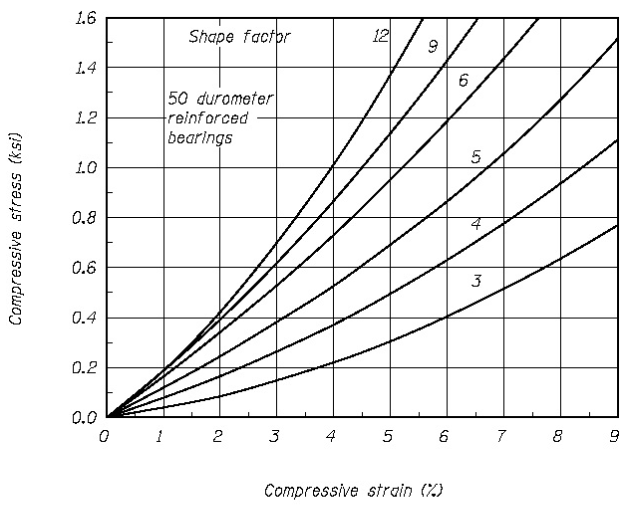

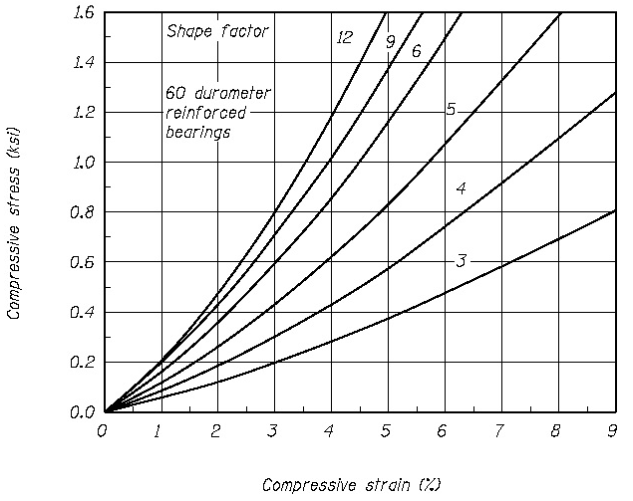

Another source [cati.com](https://www.cati.com/blog/convert-durometer-to-youngs-modulus/), mentioned the following formulas to translate  
Shore-A to Approximate Young's Moduli.

Shore-A to Youngs Modulus (the formula was for MPa, the .1450377 is a  
conversion);

In [16]:
import math

dur_50_youngs_modulus = round(math.exp(50 * 0.0235 - 0.6403) * .1450377, 2)
print(f"{dur_50_youngs_modulus=:}")

dur_60_youngs_modulus = round(math.exp(60 * 0.0235 - 0.6403) * .1450377, 2)
print(f"{dur_60_youngs_modulus=:}")

dur_50_youngs_modulus=0.25
dur_60_youngs_modulus=0.31


In [17]:
# Using these values seems to be about half the results of using a shape factor  
# of 12 / 10
print(1.6 * dur_50_youngs_modulus * 20)

8.0


##### Figuring Out the Actual Formulas...

For 50 Durometer hardness the graph presents the following estimated values  
for a shape factor of 12;

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [19]:
# Define multiple datasets
dur_50_datasets = {
    "dur_50_pts_sf_12": [
        (0, 0), (.1, .53), (.2, 1.04), (.3, 1.49), (.4, 1.88), (.5, 2.29),
        (.6, 2.66), (.7, 2.99), (.8, 3.33), (.9, 3.65), (1, 3.95), (1.1, 4.24), 
        (1.2, 4.52), (1.3, 4.81), (1.4, 5.07), (1.5, 5.33), (1.6, 5.55)        
    ],
    "dur_50_pts_sf_9": [
        (0, 0), (.1, .55), (.2, 1.06), (.3, 1.54), (.4, 2.04), (.5, 2.49), 
        (.6, 2.92), (.7, 3.34), (.8, 3.74), (.9, 4.12), (1, 4.49), (1.1, 4.84), 
        (1.2, 5.21), (1.3, 5.56), (1.4, 5.90), (1.5, 6.22), (1.6, 6.52)  
    ],
    "dur_50_pts_sf_6": [
        (0, 0), (.1, .57), (.2, 1.22), (.3, 1.78), (.4, 2.31), (.5, 2.84),  
        (.6, 3.37), (.7, 3.84), (.8, 4.32), (.9, 4.75), (1, 5.19), (1.1, 5.63),  
        (1.2, 6.03), (1.3, 6.46), (1.4, 6.84), (1.5, 7.23), (1.6, 7.58)
    ],
    "dur_50_sf_5": [
        (0, 0), (.1, .84), (.2, 1.64), (.3, 2.39), (.4, 3.11), (.5, 3.82), 
        (.6, 4.44), (.7, 5.03), (.8, 5.62), (.9, 6.17), (1, 6.68), (1.1, 7.19), 
        (1.2, 7.63), (1.3, 8.10), (1.4, 8.53), (1.5, 8.98)
    ],
    "dur_50_sf_4": [
        (0, 0), (.1, 1.23), (.2, 2.36), (.3, 3.31), (.4, 4.23), (.5, 5.01), 
        (.6, 5.77), (.7, 6.45), (.8, 7.14), (.9, 7.76), (1, 8.34), (1.1, 8.99)
    ],
    "dur_50_sf_3": [
        (0, 0), (.1, 2.26), (.2, 3.70), (.3, 4.91), (.4, 5.92), (.5, 6.85), 
        (.6, 7.72), (.7, 8.49)
    ]
}

In [20]:
# Define the constrained quadratic function: y = a * x^2
def constrained_quadratic_func(x, a):
    return a * x**1.3

dur_50_pts_sf_12 - Best-fit equation: y = 0.1697 * x^1.3
dur_50_pts_sf_9 - Best-fit equation: y = 0.1413 * x^1.3
dur_50_pts_sf_6 - Best-fit equation: y = 0.1166 * x^1.3
dur_50_sf_5 - Best-fit equation: y = 0.0858 * x^1.3
dur_50_sf_4 - Best-fit equation: y = 0.0627 * x^1.3
dur_50_sf_3 - Best-fit equation: y = 0.0414 * x^1.3


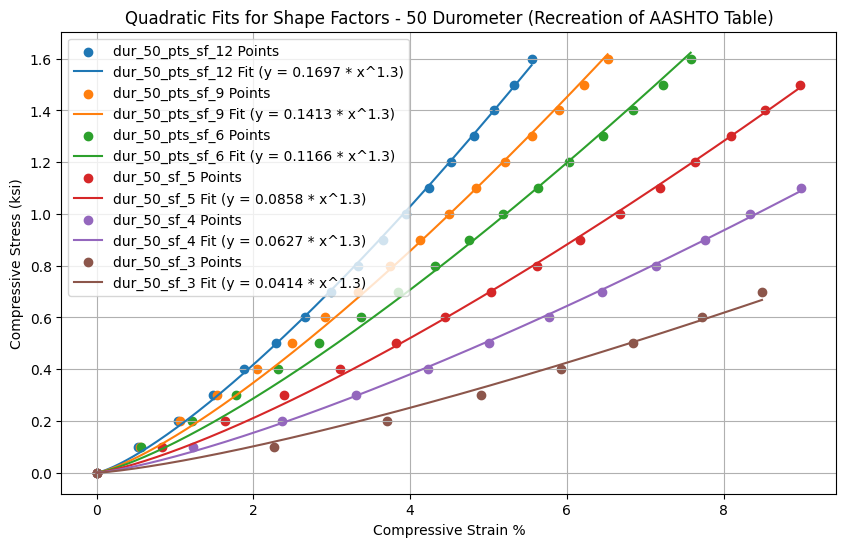

In [21]:
# Plot all data and their corresponding fitted curves
plt.figure(figsize=(10, 6));  # Set a larger figure size for better visualization

for label, data in dur_50_datasets.items():
    # Flip the data (swap x and y)
    flipped_data = [(y, x) for x, y in data]
    
    # Extract flipped x and y
    x_vals = np.array([x[0] for x in flipped_data])
    y_vals = np.array([x[1] for x in flipped_data])
    
    # Fit the quadratic curve (constrained to pass through (0, 0))
    params, _ = curve_fit(constrained_quadratic_func, x_vals, y_vals, p0=(0.5,))
    a = params[0]
    print(f"{label} - Best-fit equation: y = {a:.4f} * x^1.3")
    
    # Generate the fitted curve
    x_fit = np.linspace(0, max(x_vals), 500)
    y_fit = constrained_quadratic_func(x_fit, a)
    
    # Plot the data points and fitted curve
    plt.scatter(x_vals, y_vals, label=f"{label} Points")
    plt.plot(x_fit, y_fit, label=f"{label} Fit (y = {a:.4f} * x^1.3)")

# Add labels, legend, and grid
plt.title('Quadratic Fits for Shape Factors - 50 Durometer (Recreation of AASHTO Table)')
plt.xlabel('Compressive Strain %')
plt.ylabel('Compressive Stress (ksi)')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# shape factor vs A Value of formula,
values = [
    (12, 0.1697),
    (9, 0.1413),
    (6, 0.1166),
    (5, 0.0858),
    (4, 0.0627),
    (3, 0.0414)
]

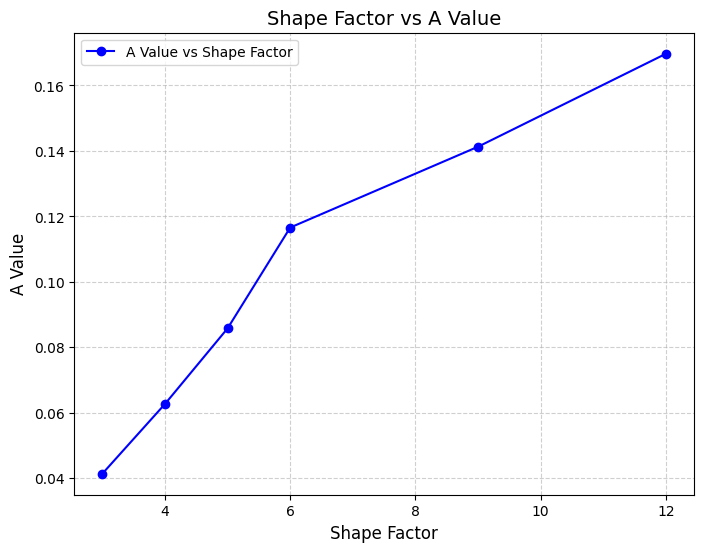

In [23]:
import matplotlib.pyplot as plt

# Data values
shape_factors = np.array([x[0] for x in values])
a_values = np.array([x[1] for x in values])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(shape_factors, a_values, marker='o', linestyle='-', color='b', 
         label='A Value vs Shape Factor')

# Labels and title
plt.title('Shape Factor vs A Value', fontsize=14)
plt.xlabel('Shape Factor', fontsize=12)
plt.ylabel('A Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Show the plot
plt.show()

##### Results

Due to there not being an obvious best fit line for this curve, we're left
with the following 6 formulas;

**50 Durometer Rubber**
| Shape Factor |        Formula       |
|:------------:|:--------------------:|
|      12      | $ y = .1697x^{1.2} $ |
|      9       | $ y = .1413x^{1.2} $ |
|      6       | $ y = .1166x^{1.2} $ |
|      5       | $ y = .0858x^{1.2} $ |
|      4       | $ y = .0627x^{1.2} $ |
|      3       | $ y = .0414x^{1.2} $ |

##### Same process for 60 Durometer;

In [24]:
# Define multiple datasets
dur_60_datasets = {
    # Shape Factor 12
    "shape_factor_12": [
        (0, 0), (0.1, .51), (0.2, .97), (0.3, 1.36), (0.4, 1.74),
        (0.5, 2.08), (0.6, 2.40), (0.7, 2.71), (0.8, 3.00), (0.9, 3.28),
        (1.0, 3.54), (1.1, 3.78), (1.2, 4.03), (1.3, 4.27), (1.4, 4.50),
        (1.5, 4.73), (1.6, 4.94)
    ],
	# Shape Factor 9
    "shape_factor_9": [
        (0, 0), (0.1, 0.51), (0.2, 1.00), (0.3, 1.46), (0.4, 1.88),
        (0.5, 2.28), (0.6, 2.64), (0.7, 2.96), (0.8, 3.30), (0.9, 3.62),
        (1.0, 3.93), (1.1, 4.24), (1.2, 4.52), (1.3, 4.79), (1.4, 5.05),
        (1.5, 5.34), (1.6, 5.58)
    ],
	# Shape Factor 6
    "shape_factor_6": [
        (0, 0), (0.1, .65), (0.2, 1.20), (0.3, 1.72), (0.4, 2.19),
        (0.5, 2.61), (0.6, 3.03), (0.7, 3.41), (0.8, 3.80), (0.9, 4.15),
        (1.0, 4.48), (1.1, 4.79), (1.2, 5.10), (1.3, 5.42), (1.4, 5.70),
        (1.5, 6.00), (1.6, 6.27)
    ],
	# Shape Factor 5 - Last point Added (not in excel)
    "shape_factor_5": [
        (0, 0), (0.1, .87), (0.2, 1.58), (0.3, 2.22), (0.4, 2.83),
        (0.5, 3.37), (0.6, 3.89), (0.7, 4.39), (0.8, 4.86), (0.9, 5.30),
        (1.0, 5.71), (1.1, 6.09), (1.2, 6.50), (1.3, 6.89), (1.4, 7.27),
        (1.5, 7.67), (1.6, 8.02)
    ],
	# Shape Factor 4 - Last point Added (not in excel)
    "shape_factor_4": [
        (0, 0), (0.1, 1.21), (0.2, 2.10), (0.3, 2.96), (0.4, 3.76),
        (0.5, 4.50), (0.6, 5.18), (0.7, 5.75), (0.8, 6.33), (0.9, 6.89),
        (1.0, 7.46), (1.1, 8.01), (1.2, 8.55)
    ],
	# Shape Factor 3 - Last point Added (not in excel)
    "shape_factor_3": [
        (0, 0), (0.1, 1.78), (0.2, 3.00), (0.3, 4.19), (0.4, 5.26),
        (0.5, 6.21), (0.6, 7.18), (0.7, 8.07), (0.8, 8.94)
    ]
}	

shape_factor_12 - Best-fit equation: y = 0.1967 * x^1.3
shape_factor_9 - Best-fit equation: y = 0.1701 * x^1.3
shape_factor_6 - Best-fit equation: y = 0.1446 * x^1.3
shape_factor_5 - Best-fit equation: y = 0.1053 * x^1.3
shape_factor_4 - Best-fit equation: y = 0.0730 * x^1.3
shape_factor_3 - Best-fit equation: y = 0.0464 * x^1.3


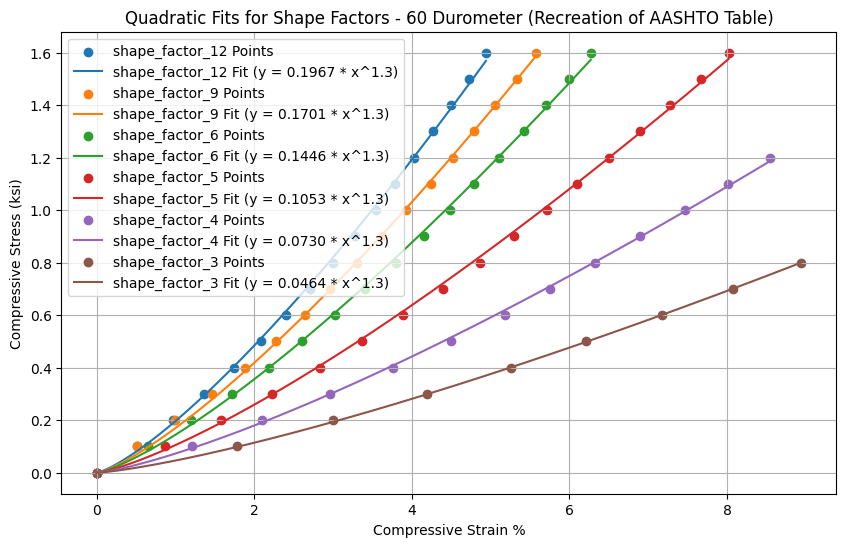

In [25]:
# Plot all data and their corresponding fitted curves
plt.figure(figsize=(10, 6));  # Set a larger figure size for better visualization

for label, data in dur_60_datasets.items():
    # Flip the data (swap x and y)
    flipped_data = [(y, x) for x, y in data]
    
    # Extract flipped x and y
    x_vals = np.array([x[0] for x in flipped_data])
    y_vals = np.array([x[1] for x in flipped_data])
    
    # Fit the quadratic curve (constrained to pass through (0, 0))
    params, _ = curve_fit(constrained_quadratic_func, x_vals, y_vals, p0=(0.5,))
    a = params[0]
    print(f"{label} - Best-fit equation: y = {a:.4f} * x^1.3")
    
    # Generate the fitted curve
    x_fit = np.linspace(0, max(x_vals), 500)
    y_fit = constrained_quadratic_func(x_fit, a)
    
    # Plot the data points and fitted curve
    plt.scatter(x_vals, y_vals, label=f"{label} Points")
    plt.plot(x_fit, y_fit, label=f"{label} Fit (y = {a:.4f} * x^1.3)")

# Add labels, legend, and grid
plt.title('Quadratic Fits for Shape Factors - 60 Durometer (Recreation of AASHTO Table)')
plt.xlabel('Compressive Strain %')
plt.ylabel('Compressive Stress (ksi)')
plt.legend()
plt.grid(True)
plt.show()

**60 Durometer Rubber**
| Shape Factor |        Formula       |
|:------------:|:--------------------:|
|      12      | $ y = .1967x^{1.3} $ |
|      9       | $ y = .1701x^{1.3} $ |
|      6       | $ y = .1446x^{1.3} $ |
|      5       | $ y = .1053x^{1.3} $ |
|      4       | $ y = .0730x^{1.3} $ |
|      3       | $ y = .0464x^{1.3} $ |

So the adjustment factors for all the formulas can be stored as such;

In [26]:
durometer_strain_factors = {
    "50": {
        "12": .1697,
        "9": .1413,
        "6": .1166,
        "5": .0858,
        "4": .0627,
        "3": .0414
    },
    "60": {
        "12": .1967,
        "9": .1701,
        "6": .1446,
        "5": .1053,
        "4": .0730,
        "3": .0464
    }
}

and then used in the following manner;

In [27]:
durometer = "50"
shape_factor = "12"

In [28]:
# This got done because AASHTO lists strain as the independent variable, which 
# seems wrong. So x and y in the formulas got twisted around during this
# This function results in the inverse of the y = Ax^1.3 formula
def get_strain_from_stress(stress, durometer, shape_factor):
    return (stress / durometer_strain_factors[durometer][shape_factor]) ** (1 / 1.3)

In [29]:
bearing.sigma_l

0.1823809523809524

In [30]:
# This doesn't exactly match the excel sheet, I disagree with the excel sheet.
# //TODO - Determine how to obtain these values, straight-line interpretation or best-fit
sigma_l = (loads['live']) / (bearing.width * bearing.length)
comp_strain = get_strain_from_stress(sigma_l, durometer, "6")
comp_strain

1.4107396357001794

In [31]:
# Laminate thickness
bearing.internal_t

0.28

In [32]:
# No. of ith layers
bearing.internal_shape_factor

7.894736842105263

In [33]:
Delta_L = comp_strain * (bearing.internal_t / 100) * bearing.plys
Delta_L

0.01975035489980251

In [34]:
if Delta_L < 0.125:
    print('OK')
else:
    print('NG')

OK


#### Check 6 - AASHTO 14.7.6.3.3 & 14.7.5.3.6 Instantaneous Total Load Deflection

`# //TODO - modify once you get the strain determination straightened out`

In [35]:
# Does the same thing above for dead load
comp_strain = get_strain_from_stress(0.60, durometer, "12")
comp_strain

2.6417976204831453

In [36]:
Delta_D = comp_strain * (bearing.internal_t / 100) * bearing.plys
Delta_D

0.03698516668676404

In [37]:
if Delta_D < 0.125:  # AASHTO C14.7.6.3.3
    print('OK')
else:
    print('NG')

OK


In [38]:
Delta_tot = Delta_D + Delta_L 
Delta_tot

0.056735521586566556

In [39]:
# AASHTO 14.7.6.3.3
if Delta_tot < 0.09 * bearing.internal_t * bearing.plys:
    print('OK')
else:
    print('NG')

OK


#### Check 7 - AASHTO 14.7.6.3.3 & 14.7.5.3.6 - Compressive Deflection

In [40]:
if bearing.durometer == 50:
    a_cr = 0.25
elif bearing.durometer == 60:
    a_cr = 0.35
else:
    print('Error')

In [41]:
Delta_lt = Delta_D + a_cr * Delta_D
Delta_lt

0.04623145835845505

In [42]:
if Delta_L + Delta_lt < 0.09 * bearing.internal_t * bearing.plys:
    print('OK')
else:
    print('NG')

OK


#### Check 8 - AASHTO 14.7.6.3.4 - Shear Deformation

AASHTO Provides two methods to check thermal expansion;

Method A - 3.12.2.1 

Temp ranges:  
- 0-120 (Moderate < 14 freezing days / yr)  
- -30-120 (Cold > 14 freezing days / yr)

Which get used in the formula;

$$ \Delta_T = \alpha L (T_{Max\ Design}-T_{Min\ Design}) \tag{3.12.2.3-1} $$

In [43]:
thermal_coeff = 6e-06

In [44]:
# L is already defined in the bearing
bearing.span

12.5

In [45]:
# AASHTO says -30 to 120 which makes this check fail
delta_t = thermal_coeff * bearing.span * (95 - 15) * 12
delta_t

0.07200000000000001

In [46]:
delta_s = delta_t

h_rt = bearing.internal_t

if 2 * delta_s <= bearing.total_elastomer_thickness:
    print('OK')
else:
    print('NG')

OK


#### Dimensionality Checks

#### Check 9 - BDM 307.2.1

See below TODO in check 10, probably BDM 306.4.

In [47]:
bearing.height

2.015

In [48]:
if bearing.total_elastomer_thickness < 5:
    print('OK')
else:
    print('NG')

OK


#### Check 10 - BDM 307.2.1

`# //TODO - (reference in Excel sheet doesn't exist (BDM 306.4?)`

In [49]:
bearing.total_laminate_thickness

0.525

In [50]:
if bearing.total_laminate_thickness < 1:
    print('OK')
else:
    print('NG')

OK


#### Check 11 - AASHTO 14.7.6.3.6

In [51]:
if bearing.width / 3 > bearing.total_laminate_thickness:
    print('OK')
else:
    print('NG')

OK


#### Check 12 - AASHTO 14.7.6.3.6

In [52]:
if bearing.length / 3 > bearing.total_laminate_thickness:
    print('OK')
else:
    print('NG')

OK


#### Check 13 - AASHTO 14.8.3.1

In [53]:
bearing_pad_area = bearing.length * bearing.width

# //TODO - Don't know where this check is from
if bearing_pad_area < 1000:
    print('OK')
else:
    print('NG')

OK


#### Check 14 - AASHTO 14.8.3.1

In [54]:
# //TODO - Don't know where this check is
if bearing.total_elastomer_thickness < 8:
    print('OK')
else:
    print('NG')

OK


#### Check 15 - AASHTO 14.8.3.1

In [55]:
loads['total_dead_load'] / 5

9.93

In [56]:
H = shear_modulus * bearing_pad_area * delta_t / bearing.total_elastomer_thickness
H

0.3856107382550336

In [57]:
if H < loads['total_dead_load'] / 5:
    print('OK')
else:
    print('NG')

OK


#### Check 16

In [58]:
bearing.steel_t

0.105

In [59]:
steel_yield_strength = 60
steel_yield_strength

60

In [60]:
sigma_L = loads['live'] / (bearing.width * bearing.length)
sigma_L

0.1823809523809524

In [61]:
sigma_S = loads['total_dead_load'] / (bearing.width * bearing.length)
sigma_S

0.5910714285714286

In [62]:
# AASHTO Table 6.6.1.2.3-1
const_ampl_fatigue_threshold = 24
# //TODO - is this constant?

In [63]:
if bearing.steel_t >= 3 * bearing.internal_t * sigma_S / steel_yield_strength:
    print('OK')
else:
    print('NG')

OK


#### Check 17

In [64]:
if bearing.steel_t >= 2 * bearing.internal_t * sigma_L / const_ampl_fatigue_threshold:
    print('OK')
else:
    print('NG')

OK


#### Check 18

Combined compression, rotation and shear - AASHTO 14.7.5.3.3

In [65]:
# These came from LEAP and are concrete specific
maximum_dl_deflection = 1.471
maximum_ll_deflection = -0.274
max_ll_deflect_coord = 12.5
span_length = 12.5
deck_slope = .01
load_plate_bevel = .01

In [66]:
# //TODO - Determine how to handle rounding of this value, excel rounds to int
# gamma_a_st = 1.4 * sigma_S / (shear_modulus * bearing.internal_shape_factor)
# //TODO - The 1.4 and 0.5 are variables depending on if the bearing is square or circular
gamma_a_st = 1.4 * sigma_S / (shear_modulus * 8)
gamma_a_cy = 1.4 * sigma_L / (shear_modulus * 8)
gamma_r_st = 0.5 * (bearing.length/bearing.internal_t)**2*abs((maximum_dl_deflection/(span_length*12)+(deck_slope)+0.005) / bearing.plys)
gamma_r_cy = 0.5 * (bearing.length/bearing.internal_t)**2*(abs(maximum_ll_deflection/(max_ll_deflect_coord*12))+0.005) / bearing.plys  # //TODO - Check the formula for this one
gamma_s_st = delta_s / bearing.total_elastomer_thickness
gamma_s_cy = 0  # //TODO - Verify

In [67]:
total_strains = (
    (gamma_a_st + gamma_r_st + gamma_s_st) + 1.75 * (
        gamma_a_cy + gamma_r_cy + gamma_s_cy
    )
)

In [68]:
if total_strains < 5.0:
    print('OK')
else:
    print('NG')

OK


#### Check 19

In [69]:
# The only strain from above that changes is gamma_r_st
gamma_r_st = 0.5 * (bearing.length/bearing.internal_t)**2*abs((maximum_dl_deflection/(span_length*12)+(deck_slope-load_plate_bevel)+0.005) / bearing.plys)

In [70]:
total_strains = (
    (gamma_a_st + gamma_r_st + gamma_s_st) + 1.75 * (
        gamma_a_cy + gamma_r_cy + gamma_s_cy
    )
)

In [71]:
if total_strains < 5.0:
    print('OK')
else:
    print('NG')

OK


### BDM Checks

Make sure these are all covered by the above checks.

#### 306.4.2.1

Minimum laminate thickness = 12 gage

#### Load Plate

(from excel sheet)

In [72]:
impact = 0.2
total_rxn_w_imp = 75.53
c = 0.167

# PEP - Plain Elastomeric Pad

Designed utilizing 'Method A' - Limited to 100 kips compressive force for  
practical bearing sizes. Practical limitations for rotation and translation  
are very small, on the order of 0.01 radians and 0.5" respectively.

# Cotton Duck Bearings

Cotton duck reinforced Pads (CDP), or fabric-reinforced bearings, are  
fabricated by vulcanizing very thin layers of elastomer with cotton fabric  
weave. They have an overall Shore ‘A’ durometer hardness in excess of 90,  
which is stiff against shear and rotation and can accommodate high  
compressive loads. Because of their resistance to translation, they are  
commonly used with a PTFE sliding surface and do not require a metallic  
substrate between the PTFE and the CDP. 

# HLMR/Pot Bearings

AASHTO LRFD BDS Article 14.7.4 has detailed design requirements for pot  
bearings.

# Steel/Mechanical Bearings

Limited design information is also provided in AASHTO LRFD BDS for  
mechanical (steel) bearing design (Article 14.7.1).

Mechanical bearings are viewed by many as outdated systems with high  
initial costs and expensive maintenance.